In [160]:
import pandas as pd
import numpy as np

In [161]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [162]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
df.groupby('Survived').Survived.count()

Survived
0    549
1    342
Name: Survived, dtype: int64

The Survived coulumn is the target column

From info(), we can obsreve that Age, Cabin and Embarked columns have null values, let's handle these null values using some
analysis.

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [166]:
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [167]:
pd.crosstab(index=[df.Sex],columns=[df.Survived],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


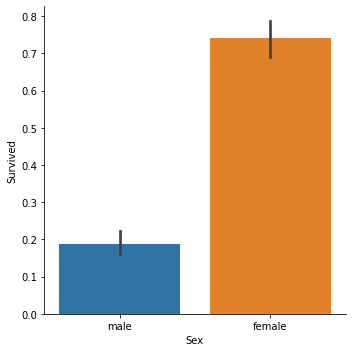

In [168]:
sns.factorplot(x='Sex',y='Survived',data=df,kind='bar')

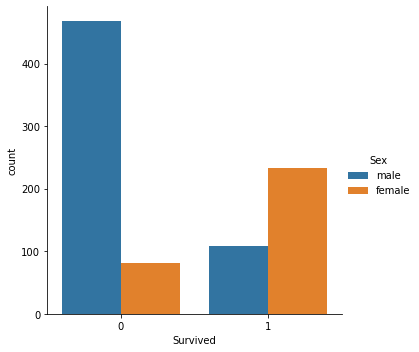

In [169]:
sns.factorplot(x='Survived',data=df,kind='count',hue='Sex')

From above observation, 81 female and 468 male are not survived, so form survived people maximum people are female.

In [170]:
pd.crosstab(index=[df.Pclass],columns=[df.Survived],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


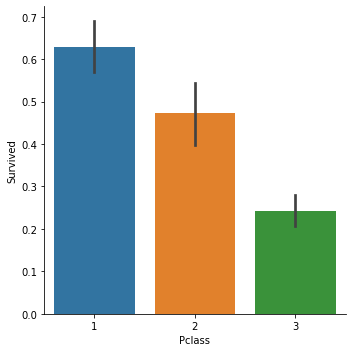

In [171]:
sns.factorplot(x='Pclass',y='Survived',data=df,kind='bar')

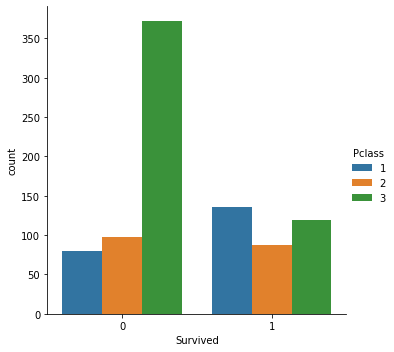

In [172]:
sns.factorplot(x='Survived',data=df,kind='count',hue='Pclass')

From above observarion, maximum people who are died from Pclass=3

In [173]:
# grouping by Sex and the respective Pclasses, let's check Survived count
pd.crosstab(index=[df.Sex,df.Pclass],columns=[df.Survived],margins=True) 

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

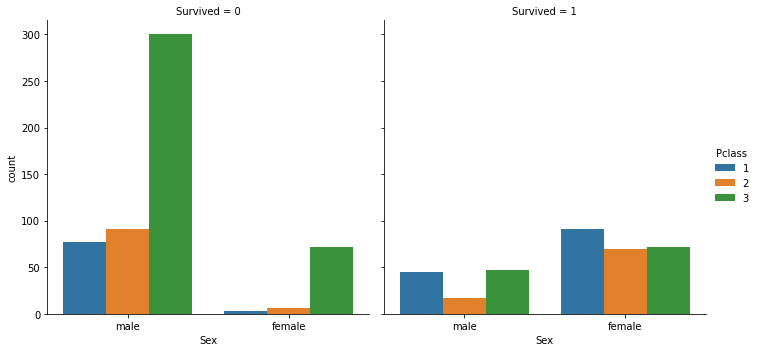

In [174]:
sns.factorplot(x='Sex',hue='Pclass',data=df,col='Survived',kind='count')

From above observation, maximum died people from Pclass 3 and they were male.

# Now handle the Null values in the features column

In [175]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [214]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [215]:
#Now drop the featur columnes which are not important for target and have object type

In [216]:
df_new=df.drop(columns=['Name','Ticket','Cabin'])

In [217]:
df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [218]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in df_new.columns:
    if df_new[i].dtypes == 'object':
        df_new[i]= enc.fit_transform(df_new[i].values.reshape(-1,1))

In [219]:
df_new.Embarked.fillna(df_new.Embarked.median(),inplace= True)

df_new.Embarked.value_counts()

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64

In [220]:
from sklearn.experimental import enable_iterative_imputer

# Import Iterative Imputer
from sklearn.impute import IterativeImputer

In [221]:
iterimp = IterativeImputer()

In [222]:
Age_df = pd.DataFrame(iterimp.fit_transform(df_new[['Sex','Age']]),columns=['Sex','Age'])
Age_df

,Sex,Age
0,1.0,22.000000
1,0.0,38.000000
2,0.0,26.000000
3,0.0,35.000000
4,1.0,35.000000
...,...,...
886,1.0,27.000000
887,0.0,19.000000
888,0.0,28.200839
889,1.0,26.000000


In [223]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    float64
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [224]:
df_new.drop(columns=['Sex','Age'],inplace=True)

In [225]:
df_final = pd.concat([df_new,Age_df],axis=1)
df_final

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex,Age
0,1,0,3,1,0,7.2500,2.0,1.0,22.000000
1,2,1,1,1,0,71.2833,0.0,0.0,38.000000
2,3,1,3,0,0,7.9250,2.0,0.0,26.000000
3,4,1,1,1,0,53.1000,2.0,0.0,35.000000
4,5,0,3,0,0,8.0500,2.0,1.0,35.000000
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,2.0,1.0,27.000000
887,888,1,1,0,0,30.0000,2.0,0.0,19.000000
888,889,0,3,1,2,23.4500,2.0,0.0,28.200839
889,890,1,1,0,0,30.0000,0.0,1.0,26.000000


In [226]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    float64
 7   Sex          891 non-null    float64
 8   Age          891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# There are no any outlier in the dataset, not procced for model

In [227]:
# Now Separting columns into features and target
x=df_final.drop(columns=['Survived'])
y=df_final.Survived


#we should scale our data. Let's use the standard scaler for that.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [228]:

#import the necessary model algos.

#classifiaction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [229]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()
svc= SVC()
gnb= GaussianNB()
gra= GradientBoostingClassifier()
Ada= AdaBoostClassifier()

In [230]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),
       GaussianNB(),GradientBoostingClassifier(),AdaBoostClassifier()]

models=['LR=LogisticRegression','DT=DecisionTreeClassifier','KNN=KNeighborsClassifier','RF=RandomForestClassifier','SVC',
       'GNB=GaussianNB','GRA=GradientBoostingClassifier','ADA=AdaBoostClassifier']

acc_result=[]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc_result.append(round (accuracy_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Accuracy Score (without tuning)
0,LR=LogisticRegression,81.01
1,DT=DecisionTreeClassifier,75.42
2,KNN=KNeighborsClassifier,82.12
3,RF=RandomForestClassifier,81.56
4,SVC,83.80
5,GNB=GaussianNB,82.12
6,GRA=GradientBoostingClassifier,83.24
7,ADA=AdaBoostClassifier,78.21


In [233]:
acc_result_tuning=[]

# Logistic Regression:

In [234]:
acc_train=[]
acc_test=[]

for i in range (0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    
    lr.fit(x_train,y_train)
    
    x_predict=lr.predict(x_train)
    y_predict=lr.predict(x_test)
    
    acc_train.append(accuracy_score(y_train,x_predict))
    acc_test.append(accuracy_score(y_test,y_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)

Index of max vaule of train's accuracy_score at random_state: 59
Index of max vaule of test's accuracy_score at random_state: 11


In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=11)
    
lr.fit(x_train,y_train)
x_predict=lr.predict(x_train)
y_predict=lr.predict(x_test)
    
print ("The training accurancy @ 11 random_state is:",accuracy_score(y_train,x_predict))
print ("The testing accurancy @ 11 ranom_state is:",accuracy_score(y_test,y_predict))
print ('\n Test Classification Report \n', classification_report(y_test,y_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_predict))
acc_result_tuning.append(accuracy_score(y_test,y_predict))

The training accurancy @ 11 random_state is: 0.7837078651685393
The testing accurancy @ 11 ranom_state is: 0.8603351955307262

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       118
           1       0.81      0.77      0.79        61

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179


 Conconfusion_matrix:
 [[107  11]
 [ 14  47]]


# Decision Tree:
##Using hyperparameter tuning. we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy. let's go ahead and try to improve our model.

In [238]:
grid_param = {
            'criterion':['gini','entropy'],
            'max_depth': range(10,15), # the max depth of the tree.
            'min_samples_leaf': range (2,6), # the max no of samples required to be at a leaf node.
            'min_samples_split': range (3,8), # the max no of samples required to split on interval node.
            'max_leaf_nodes': range (5,10) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}

In [239]:
grid_search = GridSearchCV (dt, param_grid = grid_param, cv=10, n_jobs = -1)
# n_jobs : Use all the cores in your system. For performance improvement.
grid_search.fit(x_train,y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [240]:
#Initiate DecisitionTreeClassifier with new parametes and train
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split=3, max_leaf_nodes=8)

# Train the model
dt.fit(x_train,y_train)

x_dt_predict=dt.predict(x_train)
y_dt_predict=dt.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_dt_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_dt_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_dt_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_dt_predict))
acc_result_tuning.append(accuracy_score(y_test,y_dt_predict))

The training accurancy is: 0.8230337078651685
The testing accurancy is: 0.8547486033519553

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89       118
           1       0.77      0.82      0.79        61

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179


 Conconfusion_matrix:
 [[103  15]
 [ 11  50]]


# K-Nearest Neighbour:

In [241]:
neighbors = [i for i in range(1,50)]
parameter_grid = { 'algorithm' : ['kd_tree', 'brute'],
                   'leaf_size' : [3,5,6,7,8],
                   'n_neighbors': neighbors}

In [242]:
gridsearch = GridSearchCV(kn, param_grid=parameter_grid)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 10}

In [246]:
#Initiate KNN with new parametes and train
kn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=10)

# Train the model
kn.fit(x_train,y_train)

x_kn_predict=kn.predict(x_train)
y_kn_predict=kn.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_kn_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_kn_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_kn_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_kn_predict))
acc_result_tuning.append(accuracy_score(y_test,y_kn_predict))

The training accurancy is: 0.8258426966292135
The testing accurancy is: 0.8268156424581006

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.88       118
           1       0.81      0.64      0.72        61

    accuracy                           0.83       179
   macro avg       0.82      0.78      0.80       179
weighted avg       0.83      0.83      0.82       179


 Conconfusion_matrix:
 [[109   9]
 [ 22  39]]


# Random forest:

In [247]:
params = {  'n_estimators' : [13,15],
            'criterion':['gini','entropy'],
            'max_depth': [10,15], # the max depth of the tree.
            'min_samples_leaf': [5,6], # the max no of samples required to be at a leaf node.
            'min_samples_split': [10,11] # the max no of samples required to split on interval node.
            #'max_leaf_nodes': range (5,10) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}

gridsearch = GridSearchCV(rf, param_grid=params,cv=10, n_jobs = -1)
gridsearch.fit(x_train,y_train)

print(gridsearch.best_params_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [248]:
#Initiate RandomForestClassifier with new parametes and train
rf=gridsearch.best_estimator_

# Train the model
rf.fit(x_train,y_train)

x_rf_predict=rf.predict(x_train)
y_rf_predict=rf.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_rf_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_rf_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_rf_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_rf_predict))
acc_result_tuning.append(accuracy_score(y_test,y_rf_predict))

The training accurancy is: 0.8693820224719101
The testing accurancy is: 0.8659217877094972

  
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       118
           1       0.85      0.74      0.79        61

    accuracy                           0.87       179
   macro avg       0.86      0.83      0.85       179
weighted avg       0.86      0.87      0.86       179


 Conconfusion_matrix:
 [[110   8]
 [ 16  45]]


In [249]:
Acc_Score_tun =[round (accuracy_score(y_test,y_predict)*100,2),
                round (accuracy_score(y_test,y_dt_predict)*100,2),
                round (accuracy_score(y_test,y_kn_predict)*100,2),
                round (accuracy_score(y_test,y_rf_predict)*100,2)]

titenic_trian_df = pd.DataFrame({'Classifier':['lr = LogisticRegression()', 'dt = DecisionTreeClassifier()',
                                               'kn = KNeighborsClassifier()','rf = RandomForestClassifier()'], 
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
titenic_trian_df

,Classifier,Accuracy Score (with tuning)
0,lr = LogisticRegression(),86.03
1,dt = DecisionTreeClassifier(),85.47
2,kn = KNeighborsClassifier(),82.68
3,rf = RandomForestClassifier(),86.59


In [251]:
Titenic_Train=pd.concat([Result_df[0:4],titenic_trian_df],axis=1)
Titenic_Train

,Model Name,Accuracy Score (without tuning),Classifier,Accuracy Score (with tuning)
0,LR=LogisticRegression,81.01,lr = LogisticRegression(),86.03
1,DT=DecisionTreeClassifier,75.42,dt = DecisionTreeClassifier(),85.47
2,KNN=KNeighborsClassifier,82.12,kn = KNeighborsClassifier(),82.68
3,RF=RandomForestClassifier,81.56,rf = RandomForestClassifier(),86.59


# we are gettig best mode; "RandomForestClassifier" with accuracy: 86.69%

# Save the model using pickle

In [252]:
import pickle
pickle.dump(rf,open('Red_Wine_Quality','wb'))